In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import torch

# Rand reps, model init fixed

In [2]:
import sys
sys.path.append('../../')

import denn.utils as ut

In [3]:
# folder = lambda i: f"/Users/dylanrandle/Downloads/POS_run_gan_053020_seed{i}/val_mse.npy"
# gan_reps = []
# for i in range(5):
#     gan_reps.append(np.load(folder(i)))
# gan_reps = np.vstack(gan_reps)

In [3]:
# gan_reps = np.load('/Users/dylanrandle/Downloads/pos_reps_052620_gan.npy')

gan_reps = np.load('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/hea/hea_rand_reps_gan.npy')

l2_reps = np.load('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/hea/hea_rand_reps_L2.npy')

l1_reps = np.load('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/hea/hea_rand_reps_L1.npy')

huber_reps = np.load('C:/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/reps/hea/hea_rand_reps_huber.npy')

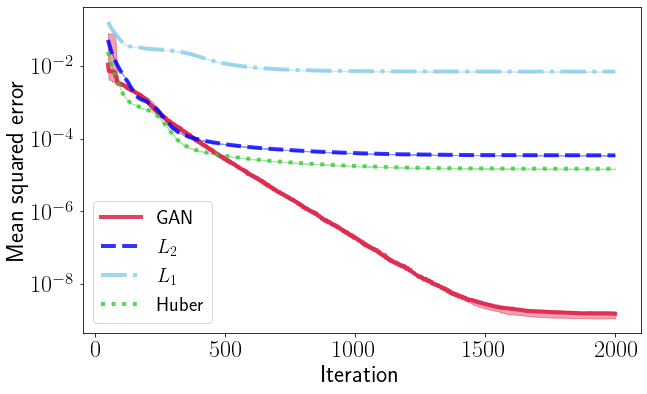

In [5]:
arrs_dict = {"GAN": gan_reps[:,:2000], 
             "$L_2$": l2_reps[:,:2000],
             "$L_1$": l1_reps[:,:2000], 
             "Huber": huber_reps[:,:2000],
#              "RK4": mse*np.ones_like(huber_reps)
            }
ut.plot_reps_results(arrs_dict, fname="hea_rand_reps.png",
                     window=50, figsize=(10,6), pctiles=(25,75), linewidth=4)

In [6]:
print(f"L1 Min: {np.min(l1_reps)}")
print(f"L2 Min: {np.min(l2_reps)}")
print(f"Huber Min: {np.min(huber_reps)}")
print(f"GAN Min: {np.min(gan_reps)}")

L1 Min: 0.006959317717701197
L2 Min: 3.4486816730350256e-05
Huber Min: 1.4623213246522937e-05
GAN Min: 6.718363643187786e-10


# Finite Diff

In [43]:
def get_exact_dt(delta_x, delta_t, dx, N):
    dt = ((delta_x*delta_t + delta_t*dx) / (N*dx - delta_x - dx))
    if dx > (dt**2) / 2:
        dt = (dt**2) / 2
    return dt

In [56]:
xmin, xmax = 0.0, 1.0
tmin, tmax = 0.0, 0.2
delta_x = xmax - xmin
delta_t = tmax - tmin
dx = 1/16
dt = get_exact_dt(delta_x=delta_x, delta_t=delta_t, dx=dx, N=32**2)

# min_diff = np.inf
# best_dx, best_dt = None, None

# for denom in range(2,100):
#     dx = 1 / denom
#     dt = get_exact_dt(delta_x=delta_x, delta_t=delta_t, dx=dx, N=32**2)

#     nx = int((delta_x)/dx) + 1
#     nt = int((delta_t)/dt) + 1
    
#     diff = np.abs(nx*nt - 32**2)
#     if diff < min_diff:
#         min_diff = diff
#         best_dx, best_dt = dx, dt
        
nx = int((delta_x)/dx) + 1
nt = int((delta_t)/dt) + 1
print(nx*nt, 32**2)

596513 1024


In [57]:
c=1.0
u = np.zeros((nx,nt))

# initial condition
def initial_cond(x):
    val = np.sin(np.pi * x)
    return val

for x in range(0,nx):
    u[x,0]=initial_cond(xmin+x*dx)

# finite difference update
for t in range(0, nt-1):
    for x in range(1,nx-1):
        u[x,t+1] = (c**2) * ((u[x-1,t]-2*u[x,t]+u[x+1,t])/dx**2)*dt + u[x,t]

In [58]:
x = np.linspace(xmin, xmax, nx)
t = np.linspace(tmin, tmax, nt)
xx, tt = np.meshgrid(x, t)

In [59]:
xx.shape, tt.shape, u.shape

((35089, 17), (35089, 17), (17, 35089))

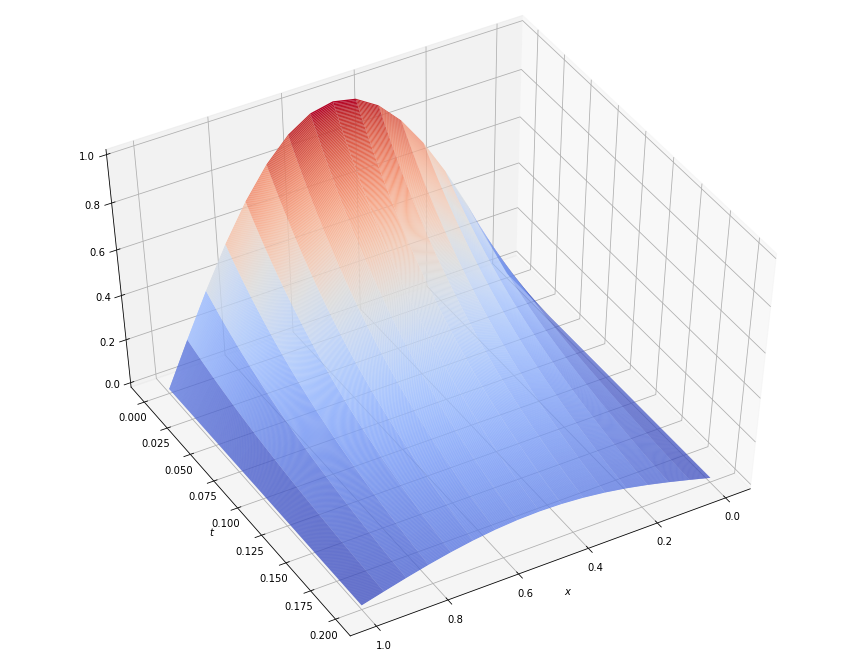

In [60]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(xx, tt, u.T, cmap=cm.coolwarm, rcount=500, ccount=500)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.view_init(elev=50, azim=60)
plt.show()

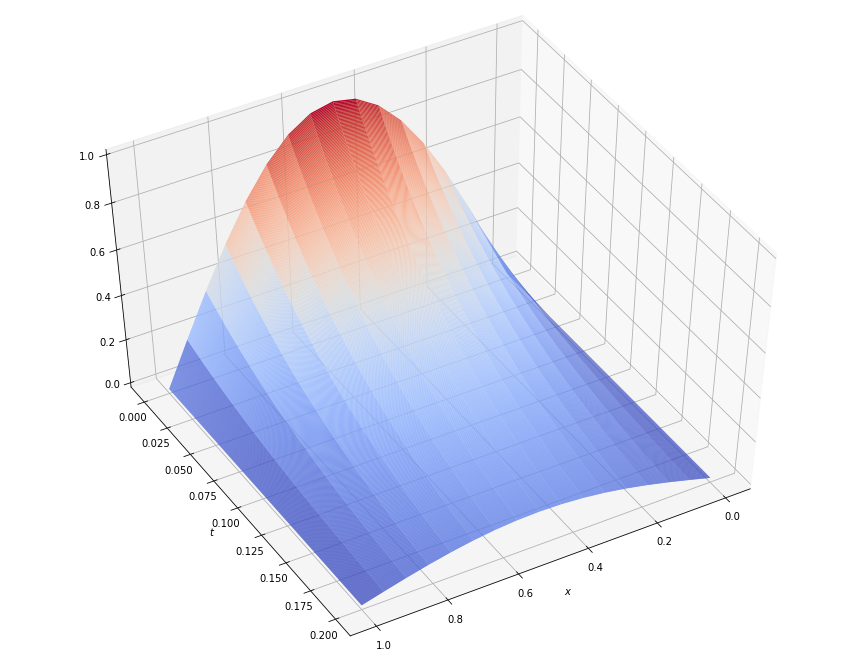

In [61]:
u_analit = np.exp(-(c**2)*(np.pi**2)*tt)*np.sin(np.pi*xx)
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(xx, tt, u_analit, cmap=cm.coolwarm, rcount=500, ccount=500)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.view_init(elev=50, azim=60)
plt.show()

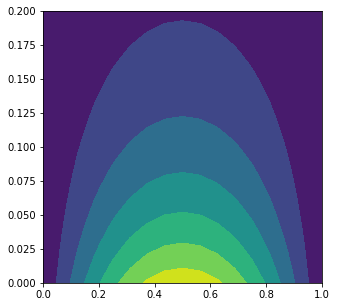

In [62]:
plt.figure(figsize=(5,5))
plt.contourf(xx, tt, u.T)

In [63]:
np.mean((u.T - u_analit)**2)

4.5796629801665784e-07